## Calculating and Plotting Weights

In this file, we provide two methods to calculate the fractional differencing weights.

1. **`cal_weight` Function**: Computes weights by iteratively adjusting the initial value based on the differencing parameter \(d\).
2. **`cal_weight_by_gamma` Function**: Computes weights using the Gamma function, which provides an alternative approach to calculate the weights.

We then compare the results of these two methods to ensure they produce consistent outputs. Finally, we plot the weights for different values of \(d\) to visualize how the weights change with the lag order.

### Plotting Weights

We plot the weights for different values of \(d\) to visualize how the weights change with the lag order. The plot helps to understand the impact of the differencing parameter on the weights.

True


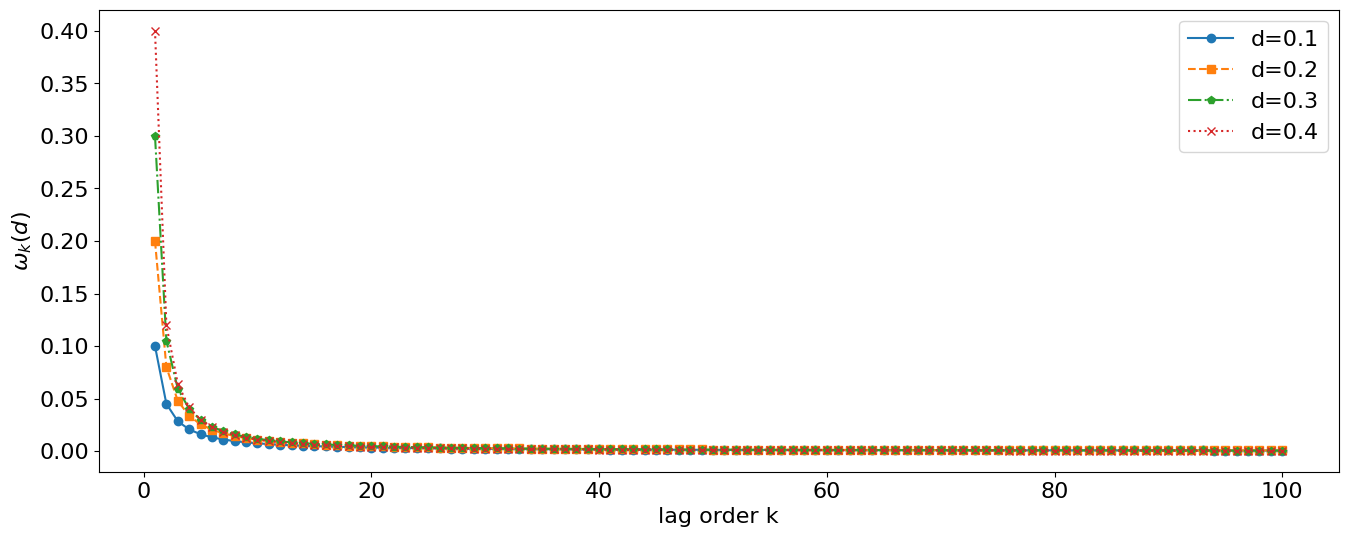

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def cal_weight(d, lag_k):
    weights = np.arange(0, lag_k).reshape(-1, 1)
    weights = (weights - d) / (weights + 1)
    weights = np.cumprod(weights)

    return -weights

def cal_weight_by_gamma(d, lag_k):
    weights = np.zeros(lag_k)
    for i in range(lag_k):
        weights[i] = gamma(i + 1 - d) / gamma(-d) / gamma(i + 2)
    return -weights

print(np.allclose(cal_weight(0.1, 100), cal_weight_by_gamma(0.1, 100)))

plt.figure(figsize=(16, 6))
marker_list = ['o', 's', 'p', 'x']
line_list = ['-', '--', '-.', ':']
start = 0
for i, d in enumerate([0.1, 0.2, 0.3, 0.4]):
    lag_k = 100
    k = np.arange(1, lag_k+1)
    weights = cal_weight(d, lag_k)
    plt.plot(k[start:], weights[start:], marker=marker_list[i], linestyle=line_list[i], label=f'd={d}')

plt.xlabel('lag order k', fontsize=16)
plt.ylabel('$\omega_k(d)$', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.savefig(f'lag_k_{start}_100_weight.pdf', dpi=300)